In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

A. DATASET

In [202]:
# (1) Import data
raw_data = pd.read_csv('D:/0. Campus/3. Term 3 2024/1. Data and Machine Learning (MATH5836)/Assessments/Assessment 3/Coding/ObesityDataSet.csv')
raw_data = raw_data.rename(columns={"NObeyesdad": "Obesity_level"})
raw_data.describe()
raw_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


B. DATA PRE-PROCESSING

In [203]:
# (2) Transform data
# encoding categorical data into integer values
transform_data = raw_data.copy()

def integer_encoding(var):
    encoder = LabelEncoder()
    transform_data[var] = encoder.fit_transform(transform_data[var])
    mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    print(f"key-value mapping - {var}:")
    print(mapping)

integer_encoding('Gender') #binary
integer_encoding('family_history_with_overweight') #binary
integer_encoding('FAVC') #binary
integer_encoding('CAEC')
integer_encoding('SMOKE') #binary
integer_encoding('SCC') #binary
integer_encoding('CALC')
integer_encoding('MTRANS')
integer_encoding('Obesity_level')
transform_data.head()

key-value mapping - Gender:
{'Female': 0, 'Male': 1}
key-value mapping - family_history_with_overweight:
{'no': 0, 'yes': 1}
key-value mapping - FAVC:
{'no': 0, 'yes': 1}
key-value mapping - CAEC:
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
key-value mapping - SMOKE:
{'no': 0, 'yes': 1}
key-value mapping - SCC:
{'no': 0, 'yes': 1}
key-value mapping - CALC:
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
key-value mapping - MTRANS:
{'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
key-value mapping - Obesity_level:
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [204]:
# encoding integer values with codes >2 (non binary) into one hot encoded
transform2_data = transform_data.copy()
transform2_data = pd.get_dummies(transform2_data, columns=['CAEC'])
transform2_data = pd.get_dummies(transform2_data, columns=['CALC'])
transform2_data = pd.get_dummies(transform2_data, columns=['MTRANS'])

# normalize continuous values using standard scaler
scaler = MinMaxScaler()
transform2_data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = scaler.fit_transform(transform2_data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
transform2_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_3,CALC_0,CALC_1,CALC_2,CALC_3,MTRANS_0,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,0,0.5,...,False,False,False,False,True,False,False,False,True,False
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,1,1.0,...,False,False,False,True,False,False,False,False,True,False
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,0,0.5,...,False,False,True,False,False,False,False,False,True,False
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,0,0.5,...,False,False,True,False,False,False,False,False,False,True
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,0,0.5,...,False,False,False,True,False,False,False,False,True,False


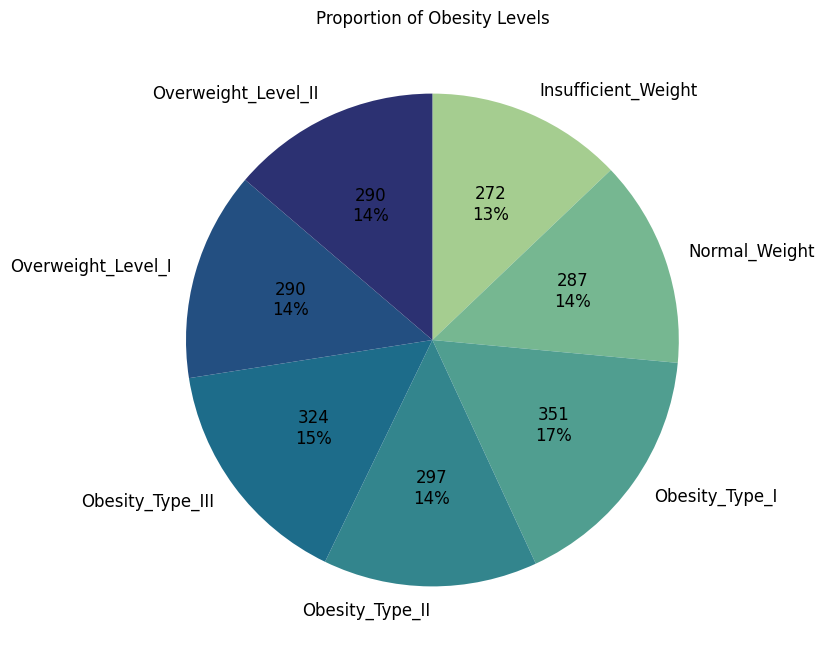

In [205]:
# (3) Visualize data
# (a) distribution
# (a1) proportion of y
def label_function(val):
    return f'{val / 100 * len(raw_data):.0f}\n{val:.0f}%'

plt.figure(figsize=(10,8))
raw_data.groupby('Obesity_level').size().plot(
    kind='pie', autopct=label_function, textprops={'fontsize': 12}, cmap='crest',
    counterclock=False, startangle=-270)
plt.title('Proportion of Obesity Levels')
plt.show()

<Figure size 1000x800 with 0 Axes>

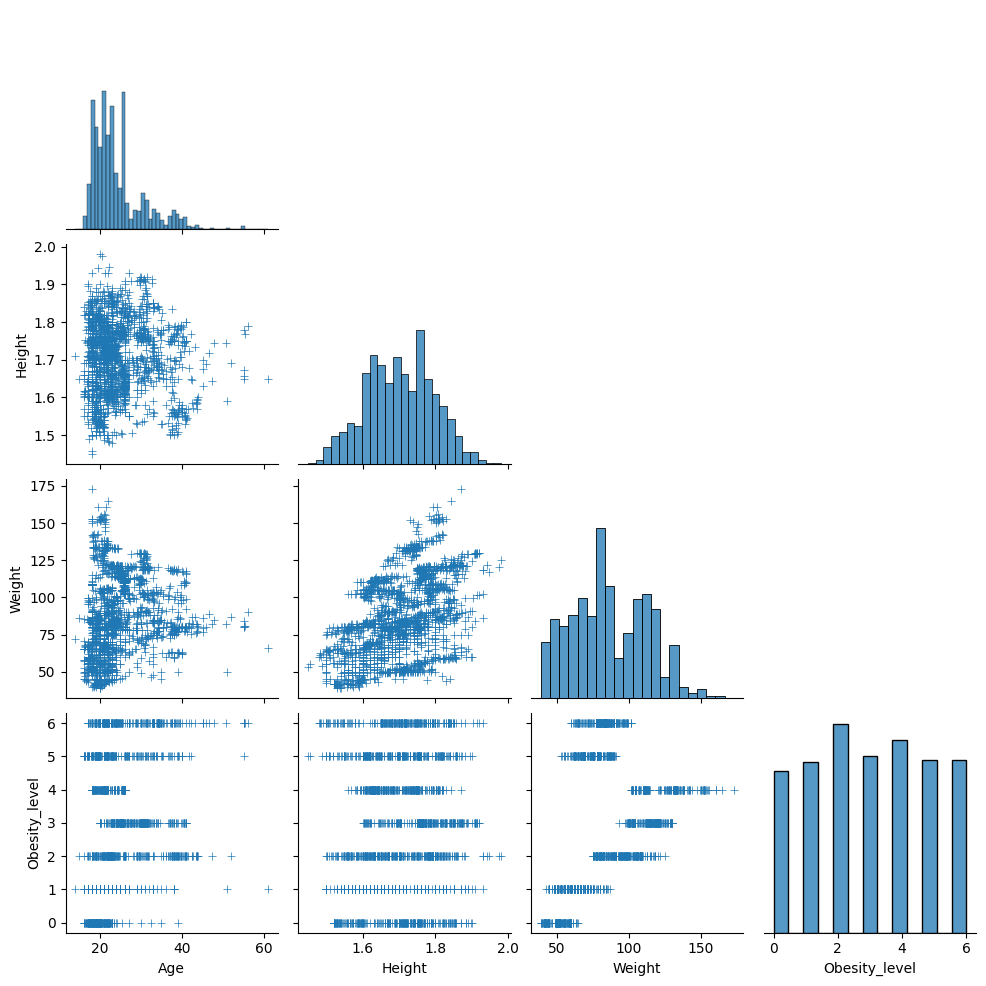

<Figure size 1000x800 with 0 Axes>

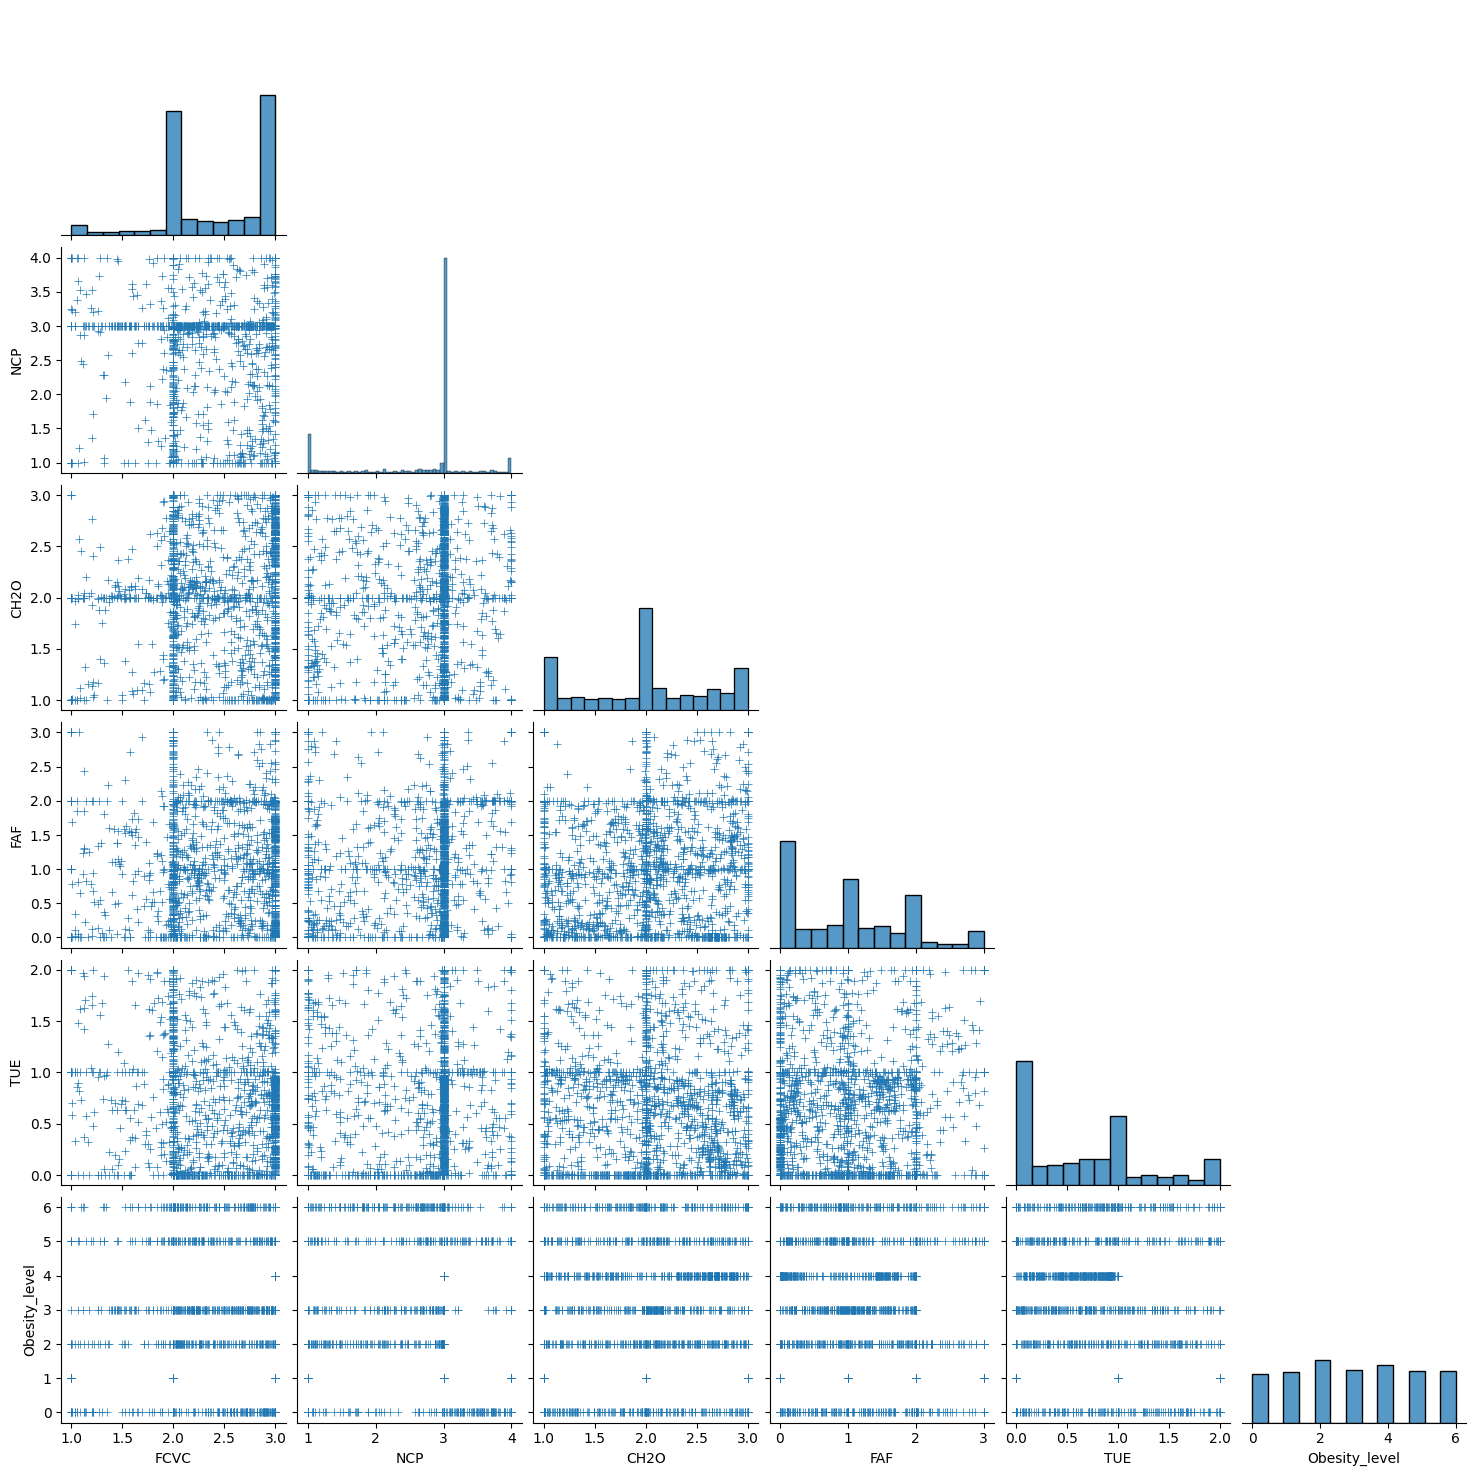

In [206]:
# (a2) distribution between features and y
# continuous predictors
# physical condition
plt.figure(figsize=(10,8))
features_grid = sns.pairplot(
    transform_data[['Age', 'Height', 'Weight', 'Obesity_level']], 
    corner=True, plot_kws=dict(marker="+", linewidth=0.5))
plt.show()
# eating & activity habits
plt.figure(figsize=(10,8))
features_grid = sns.pairplot(
    transform_data[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Obesity_level']], 
    corner=True, plot_kws=dict(marker="+", linewidth=0.5))
plt.show()

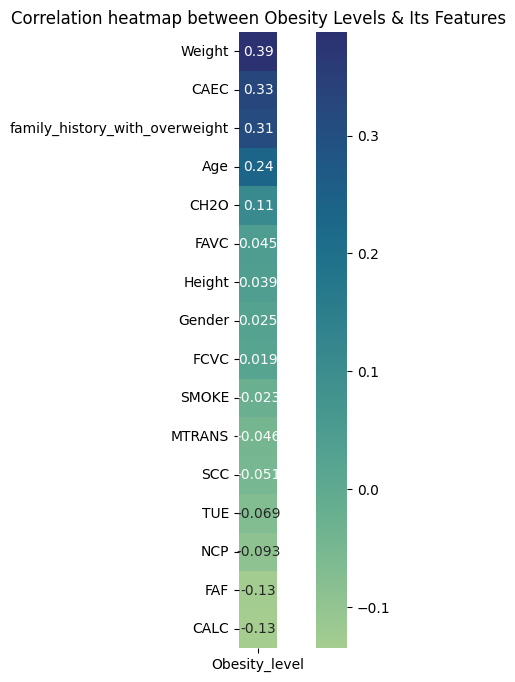

In [207]:
# (b) correlation
corr_data = transform_data.corr()
y_corr = corr_data[['Obesity_level']].drop('Obesity_level')
plt.figure(figsize=(10,8))
sns.heatmap(y_corr.sort_values(by=['Obesity_level'],ascending=False), annot=True, cmap='crest', square=True)
plt.title('Correlation heatmap between Obesity Levels & Its Features')
plt.savefig
plt.show()

In [208]:
# (4) Split data into X and Y, 60% train and 40% test dataset
data_X = transform2_data.drop(columns=['Obesity_level'])
data_y = transform2_data[['Obesity_level']]                              
def training_test_set(experiment_number, data_X, data_y):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.4, random_state=experiment_number)
    return X_train, X_test, y_train, y_test

C. DATA MODELLING

In [212]:
# (1) Develop models:
# decision tree, XGBoost, Naive Bayes, Random Forest, Adam
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

def run_models(id_model, X_train, X_test, y_train, y_test, hidden, run_num, tree_depth, num_estimator, learn_rate):
    if id_model == 1: # Decision Tree Classifier (pre-pruning)
        model = DecisionTreeClassifier(bojective = 'multi:softmax', eval_metric = 'merror', random_state=run_num, max_depth=tree_depth, min_samples_split=16, min_samples_leaf=5) #manually change max_depth (10, 11), min_samples_split (16, 17), min_samples_leaf (5, 6)
    elif id_model == 2: # XGBoost
        model = xgb.XGBClassifier(subsample = 0.8, eta = 0.3, colsample_bytree = 0.8, alpha = 5, max_depth = tree_depth, n_estimators = num_estimator, learning_rate = num_estimator)
    elif id_model == 3: # Naive Bayes Classifier
        model = GaussianNB()
    elif id_model == 4: # Random Forest Classifier
        model = RandomForestClassifier(random_state=run_num, max_depth=tree_depth, n_estimators=num_estimator)
    elif id_model == 5: # Adam Optimizer Classifier
        model = MLPClassifier(solver='adam', alpha=0.1, max_iter=100, hidden_layer_sizes=(hidden,), random_state=run_num, learning_rate_init=learn_rate)
    elif id_model == 6:
        model = GradientBoostingClassifier(n_estimators=num_estimator,  random_state=run_num)
    elif id_model == 7: # Decision Tree Classifier (post-pruning)
        model = DecisionTreeClassifier(random_state=run_num)
    elif id_model == 8: # Adam Optimizer with L2 regularization and dropout
        model = Sequential()
        model.add(Dense(hidden, activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.2))
        model.add(Dense(7, activation='softmax'))
        model.compile(optimizer=Adam(), metrics=['accuracy'])

    y_predict = pd.DataFrame()
    y_predict_train = pd.DataFrame()

    if id_model < 7:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        y_predict_train = model.predict(X_train)
        
    if id_model == 7:
        model.fit(X_train, y_train)
        path = model.cost_complexity_pruning_path(X_train, y_train)
        ccp_alphas = path.ccp_alphas
        best_alpha = None
        best_accuracy = 0
        for alpha in ccp_alphas:
            clf_post_pruned = DecisionTreeClassifier(random_state=run_num, ccp_alpha=alpha)
            clf_post_pruned.fit(X_train, y_train)
            y_pred_post_pruned = clf_post_pruned.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred_post_pruned)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_alpha = alpha
        clf_best_post_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
        clf_best_post_pruned.fit(X_train, y_train)
        y_predict = clf_best_post_pruned.predict(X_test)
        y_predict_train = clf_best_post_pruned.predict(X_train)
    elif id_model == 8:
        model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)
        y_predict = np.argmax(model.predict(X_test), axis=1)
        y_predict_train = np.argmax(model.predict(X_train), axis=1)
    
    y_predict_proba = pd.DataFrame()
    y_predict_train_proba = pd.DataFrame()
    if id_model < 8:
        y_predict_proba = model.predict_proba(X_test)
        y_predict_proba = np.array(y_predict_proba)
        y_predict_train_proba = model.predict_proba(X_train)
        y_predict_train_proba = np.array(y_predict_train_proba)
    if id_model == 8:
        y_predict_proba = model.predict(X_test)
        y_predict_train_proba = model.predict(X_train)
        
    # Assessment output for TEST dataset
    auc = roc_auc_score(y_test, y_predict_proba, multi_class='ovr', average='macro')
    acc = accuracy_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict, average='macro', labels=np.unique(data_y))
    
    # Assessment output for TRAIN dataset
    auc_train = roc_auc_score(y_train, y_predict_train_proba, multi_class='ovr', average='macro')
    acc_train = accuracy_score(y_train, y_predict_train)
    f1_train = f1_score(y_train, y_predict_train, average='macro', labels=np.unique(data_y))
    
    return auc, acc, f1, auc_train, acc_train, f1_train

In [ ]:
# (2) run & print experiments 15 times
def run_experiments(data_X, data_y):
    number_of_experiments = 2
    # Assign hyperparameter values
    hidden = 1
    tree_depth = 10
    num_estimator = 50
    learn_rate = 0.1

    # TEST dataset
    auc_all = np.zeros(number_of_experiments)
    acc_all = np.zeros(number_of_experiments)
    f1_all = np.zeros(number_of_experiments)
    # TRAIN dataset
    auc_train_all = np.zeros(number_of_experiments)
    acc_train_all = np.zeros(number_of_experiments)
    f1_train_all = np.zeros(number_of_experiments)

    for i in range(1, 9):
        if i == 1:
            print("===DECISION TREE===")
        elif i == 2:
            print("===XGBOOST===")
        elif i == 3:
            print("===NAIVE BAYES===")
        elif i == 4:
            print("===RANDOM FOREST===")
        elif i == 5:
            print("===ADAM OPTIMIZER===")
        elif i == 6:
            print("===GRADIENT BOOSTING")
        elif i == 7:
            print("===DECISION TREE POST-PRUNING===")
        elif i == 8:
            print("===ADAM WITH L2 REGULARIZATION AND DROPOUTS===")
        
        for experiment_number in range(0, number_of_experiments):
            X_train, X_test, y_train, y_test = training_test_set(experiment_number, data_X, data_y)
            auc, acc, f1, auc_train, acc_train, f1_train = run_models(i, X_train, X_test, y_train, y_test, hidden, experiment_number, tree_depth, num_estimator, learn_rate)

            # TEST dataset
            auc_all[experiment_number] = auc
            acc_all[experiment_number] = acc
            f1_all[experiment_number] = f1
            # TRAIN dataset
            auc_train_all[experiment_number] = auc_train
            acc_train_all[experiment_number] = acc_train
            f1_train_all[experiment_number] = f1_train

        np.set_printoptions(legacy='1.25')
        # TEST dataset
        print("Output Metrics TEST dataset:")    
        print(f"MEAN, STD of AUC: {np.mean(auc_all), np.std(auc_all)}")
        print(f"MEAN, STD of Accuracy: {np.mean(acc_all), np.std(acc_all)}")
        print(f"MEAN, STD of F1: {np.mean(f1_all), np.std(f1_all)}")
        print()
        # TRAIN dataset
        print("Output Metrics TRAIN dataset:")    
        print(f"MEAN, STD of AUC: {np.mean(auc_train_all), np.std(auc_train_all)}")
        print(f"MEAN, STD of Accuracy: {np.mean(acc_train_all), np.std(acc_train_all)}")
        print(f"MEAN, STD of F1: {np.mean(f1_train_all), np.std(f1_train_all)}")

# run experiments
run_experiments(data_X, data_y)


===XGBOOST===
Output Metrics TEST dataset:
MEAN, STD of AUC: (0.5835083925220532, 0.008745155590061116)
MEAN, STD of Accuracy: (0.25976331360946747, 0.02189349112426034)
MEAN, STD of F1: (0.18899827837164496, 0.03015445929100939)

Output Metrics TRAIN dataset:
MEAN, STD of AUC: (0.5789034708409695, 0.0008123963747835861)
MEAN, STD of Accuracy: (0.24249605055292262, 0.011058451816745654)
MEAN, STD of F1: (0.17763313433961936, 0.016183229853836273)


Tree structure (text format):
|--- Weight <= 0.45
|   |--- Weight <= 0.16
|   |   |--- Height <= 0.40
|   |   |   |--- Weight <= 0.06
|   |   |   |   |--- Weight <= 0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Weight >  0.04
|   |   |   |   |   |--- class: 0
|   |   |   |--- Weight >  0.06
|   |   |   |   |--- Height <= 0.12
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- Height >  0.12
|   |   |   |   |   |--- Weight <= 0.09
|   |   |   |   |   |   |--- Height <= 0.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Height >  0.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Weight >  0.09
|   |   |   |   |   |   |--- Age <= 0.07
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  0.07
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- Height >  0.40
|   |   |   |--- Weight <= 0.16
|   |   |   |   |--- FAF <= 0.97
|   |   |   |   |   |--- FCVC <= 0.02
|   |   |   |   |   |   |--- class: 0
|

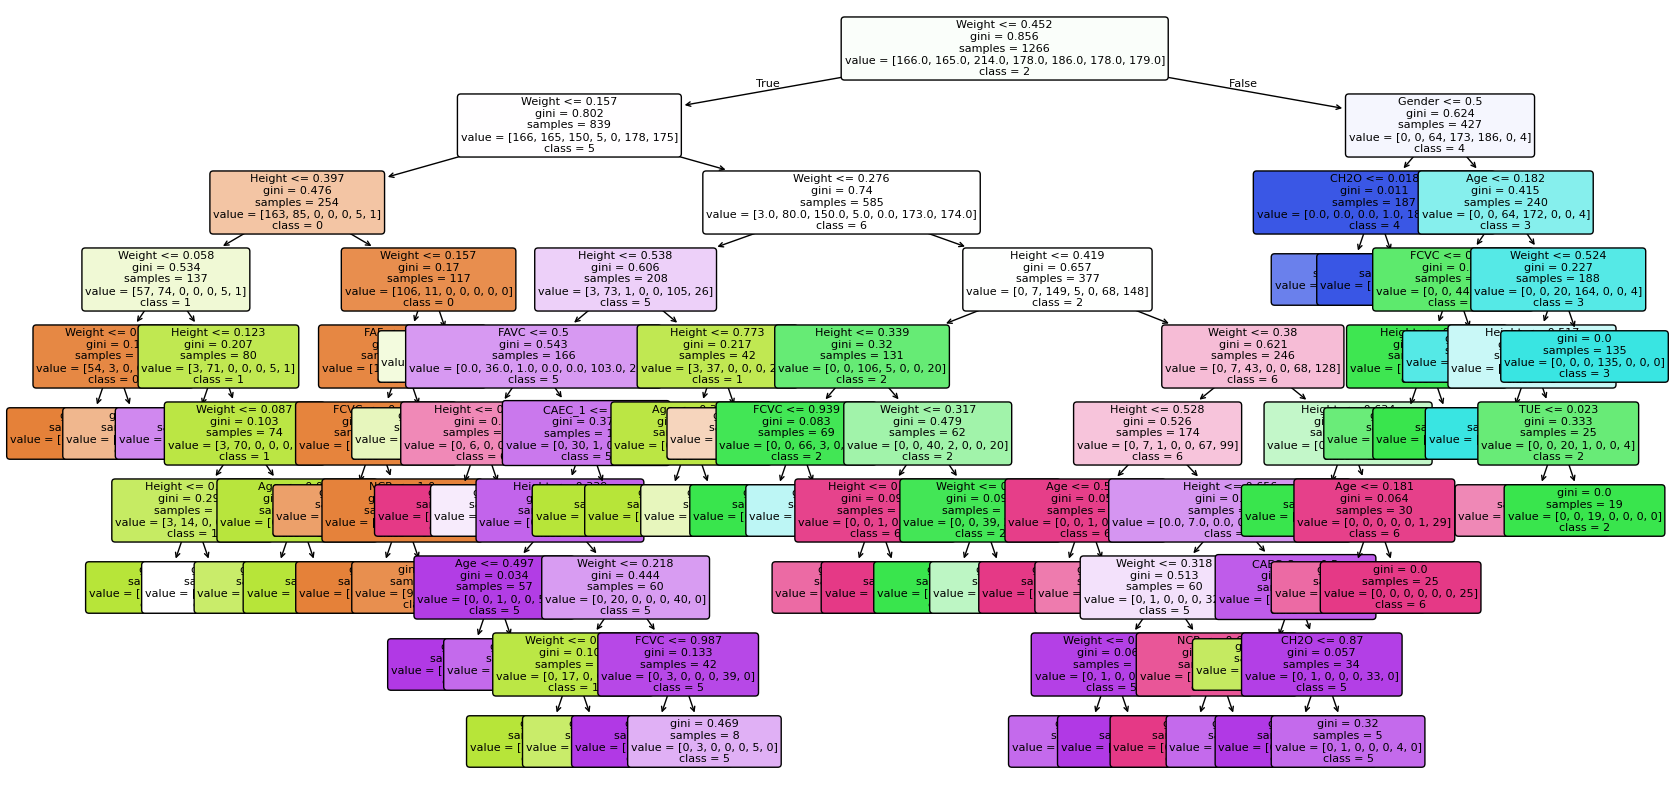

In [211]:
# print tree structure
from sklearn.tree import export_text, plot_tree

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.4, random_state=42)

tree = DecisionTreeClassifier(random_state=42, max_depth=11, min_samples_split=17, min_samples_leaf=5)
tree.fit(X_train, y_train)

tree_rules = export_text(tree, feature_names=data_X.columns.tolist())
print("Tree structure (text format):")
print(tree_rules)

plt.figure(figsize=(20, 10)) 
plot_tree(tree, filled=True, feature_names=data_X.columns.tolist(), class_names=['0', '1', '2', '3', '4', '5', '6'], rounded=True, fontsize=8)

# Show the plot
plt.show()